<center>
    <h1>INF-477. Redes Neuronales Artificiales.</h1>
    <h2>Tarea 1 - Perceptrones Multicapa ó Redes FF</h2>
    <hr>
    <h3>Natalia Gonzales</h3>
    <h3>Juan Carlos Garcés Bernt</h3>
    <!-- <h5>jcgarces@alumnos.inf.utfsm.cl</h5> -->
    <img width="20%" src="https://cdn4.iconfinder.com/data/icons/iconsimple-logotypes/512/github-256.png">
    <a href="https://github.com/jx4nk00/ANN_tarea1" > GitHub Repository</a>
<center>

# 1 El XOR
<img width="20%" src="./img/deseado-XOR.jpg">
<center>Fig. 1: Distribución deseada para la actividad 1. Los 2 colores representan 2 clases distintas.</center>

1. Escriba una función que genere (aleatoriamente) $n$ datos etiquetados de la forma $\{(x_{1}, y_{1}),...,(x_{n}, y_{n})\}$,
$x_{i} \in \mathbb{R}^{2}, y_{i} \in \{0, 1\}$, con una distribución de probabilidad que refleje la configuración linealmente inseparable que muestra la $Fig.1$. Utilice esta función para generar un conjunto de $1000$ datos de entrenamiento y $1000$ datos de pruebas. El problema de clasificación obtenido se denomina en ocasiones
"XOR". ¿Porqué?

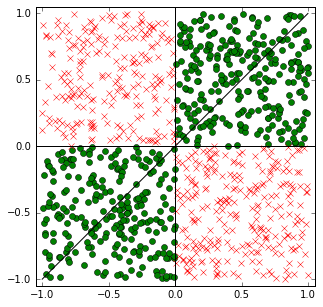

In [167]:
from ipywidgets import *
from numpy.random import uniform
import numpy as np
import matplotlib.pyplot as plt

n=1000
x_train = uniform(low=-1.0,high=1.0,size=(n,2))
x_test = uniform(low=-1.0,high=1.0,size=(n,2))

y_train=[]
y_test=[]
c1x=[]
c1y=[]
c2x=[]
c2y=[]

# Tag TRAIN
# shape[0] cantidad de filas
for i in range(x_train.shape[0]):
    if x_train[i,0]>0 and x_train[i,1]>0:
        y_train.append(1)
        c1x.append(x_train[i,0])
        c1y.append(x_train[i,1])

    else: 
        if x_train[i,0]<0 and x_train[i,1]<0:
            y_train.append(1)
            c1x.append(x_train[i,0])
            c1y.append(x_train[i,1])
        else:
            y_train.append(0)
            c2x.append(x_train[i,0])
            c2y.append(x_train[i,1])


for i in range(x_test.shape[0]):
    if x_test[i,0]>0 and x_test[i,1]>0:
        y_test.append(1)

    else: 
        if x_test[i,0]<0 and x_test[i,1]<0:
            y_test.append(1)
        else:
            y_test.append(0)

plt.figure(figsize=(5,5))
plt.plot(c1x, c1y, 'go',label="Clase 1")
plt.plot(c2x, c2y, 'rx', label="Clase 2")
plt.plot([-1,1],[-1,1],"-k",label="--")
plt.axhline(0, color='k')
plt.axvline(0, color='k')
#plt.legend(loc='center right')
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.show()

$\textbf{Problema de clasificación XOR:}$ El problema XOR ("o exclusiva") es uno de los  problemas más conocidos que no puede resolver el Perceptron, ya que es problema no linealmente separable (que exista una línea (o hiperplano) que separe grupos de entradas que tengan la misma salida). El perceptrón (de Rosemblatt) da lugar a una frontera lineal, ya que sólo entrega una combinación lineal (a lo más con la adición de una constante (bias)) de los inputs.

Al introducir capas al Perceptron, se logra superar la barrera de la linealidad y es posible trazar las fronteras entre ambos conjuntos (cruces y círculos).
<hr>
2. Demuestre experimentalmente que una neurona artificial individual no puede resolver satisfactoriamente el problema anterior. Puede utilizar la funcion de activación y el método de entrenamiento que prefiera. Sea convincente. Describa y explique lo que observa.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(1, input_dim=1000))
model.add(Activation('relu'))


3. Demuestre experimentalmente que un perceptron multicapas puede resolver satisfactoriamente el problema obtenido en (a). Puede utilizar la arquitectura y el método de entrenamiento que prefiera. Sea convincente. Describa y explique lo que observa.

In [113]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

model = Sequential() # nuevo modelo tipo sequential (definida por capas)

model.add(Dense(15, input_dim=2, init="uniform"))
model.add(Activation("relu")) # a la capa escondida
model.add(Dense(1, init="uniform")) #output
model.add(Activation("linear")) # lineal       softmax

sgd = SGD(lr=0.02)

# funcion de pérdida: 0.1, eqm,    problema de clasificación o regresión mean_squared_error binary_crossentropy
model.compile(optimizer=sgd,loss="mean_squared_error")#, metrics=["accuracy"])

# model.fit -> entrenar
hist = model.fit(x_train,
                 y_train, 
                 nb_epoch=300,
                 verbose=0)
error_test = model.evaluate(x_test,y_test)
error_train = model.evaluate(x_train,y_train)
print("\nTest:",error_test)
print("Train: ",error_train)

  32/1000 [..............................] - ETA: 0s
Test: 0.0629966134429
Train:  0.0581762489676


<hr><hr><hr>
# 2 Predicción de Precio de una Casa
En esta sección trabajaremos con un pequeño dataset conocido como *Boston Housing* que nos permitirá
experimentar de modo más completo y exhaustivo con las técnicas bajo estudio. El problema consiste en
predecir el precio de una casa en una zona/barrio de Boston (USA) a partir de una serie de atributos que
describen el lugar que éste se ubica: tasa de criminalidad, proporción de zona residencial, proporción de zona
industrial, si se encuentra junto al río ó no, contaminación atmosférica medida como la concentración de
óxidos nítricos en el aire, etc. Para ver en detalle la descripción de la semántica asociada a los atributos de
este problema, puede consultar https://archive.ics.uci.edu/ml/datasets/Housing.
<img width="70%" src="./img/houses.jpg">

### (a) Construya un dataframe con los datos a analizar descargando los datos desde la URL mantenida por los autores de . Explique qué hacen las líneas $4$ a $7$

In [169]:
import pandas as pd
url = "http://mldata.org/repository/data/download/csv/regression-datasets-housing/"

df = pd.read_csv(url, sep=",",header=None, names=["CRIM","ZN","INDUS","CHAS","NOX",
        "RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"])
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(df, test_size=0.25, random_state=0)

En la línea 4 y 5 se crea una variable df (dataframe) que hace lectura de un documento separado por comas (.CSV) ignorando la cabecera (header) y todas las columnas correspondientes a la lista "names", las siglas se pueden ver a continuación
Attribute Information:

1. **CRIM**: per capita crime rate by town 
2. **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. **INDUS**: proportion of non-retail business acres per town 
4. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. **NOX**: nitric oxides concentration (parts per 10 million) 
6. **RM**: average number of rooms per dwelling 
7. **AGE**: proportion of owner-occupied units built prior to 1940 
8. **DIS**: weighted distances to five Boston employment centres 
9. **RAD**: index of accessibility to radial highways 
10. **TAX**: full-value property-tax rate per \$10,000 
11. **PTRATIO**: pupil-teacher ratio by town 
12. **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. **LSTAT**: % lower status of the population 
14. **MEDV**: Median value of owner-occupied homes in \$1000's

En la línea 6 se importa la función *train_test_split* de la librería de *sklearn.cross_validation*, esta función toma como input un dataframe y por medio de parámetros puede manejar dicha información retornando dos dataframes (entrenamiento y pruebas) , en este caso se está utilizando el parámetro: 

En la línea 7 se deinen dos variables *df_train* y *df_test* que serán los 2 nuevos dataframes obtenidos por la división del original (df) al utilizar la función recien importada *train_test_split*, esta función recibe tres parámetros de entrada:

*df*: Datafrase obtenido desde el archivo .CSV

*test_size* : Corresponde a un valor entre 0 y 1 que representa la porporción del dataset que incluirá en la separación del dataset. 

*random_state* : Numero generador para un muestreo aleatorio.

## (b) Describa brevemente el dataset a utilizar
```python
df.shape
df.info()
df.describe()
```

Función para describir el dataset

In [170]:
def DescribeDataSet(df):
    r,c = df.shape
    print("Dataframe de {} filas y {} columnas\n\n".format(r,c))

    print("Resumen del dataframe:")
    df.info()
    print("\n\n")

    print("Dataframe (sin datos nulos):")
    print(df.describe())

### dataframe : df_train

In [171]:
DescribeDataSet(df_train)

Dataframe de 379 filas y 14 columnas


Resumen del dataframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 245 to 172
Data columns (total 14 columns):
CRIM       379 non-null float64
ZN         379 non-null int64
INDUS      379 non-null float64
CHAS       379 non-null int64
NOX        379 non-null float64
RM         379 non-null float64
AGE        379 non-null float64
DIS        379 non-null float64
RAD        379 non-null int64
TAX        379 non-null int64
PTRATIO    379 non-null int64
B          379 non-null float64
LSTAT      379 non-null float64
MEDV       379 non-null float64
dtypes: float64(9), int64(5)
memory usage: 44.4 KB



Dataframe (sin datos nulos):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     3.412736   11.846966   11.083509    0.065963    0.556160    6.312683   
std      8.258225   23.795153    7.021496    0.248546    0.116179  

### dataframe : df_test

In [172]:
DescribeDataSet(df_test)

Dataframe de 127 filas y 14 columnas


Resumen del dataframe:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 329 to 306
Data columns (total 14 columns):
CRIM       127 non-null float64
ZN         127 non-null int64
INDUS      127 non-null float64
CHAS       127 non-null int64
NOX        127 non-null float64
RM         127 non-null float64
AGE        127 non-null float64
DIS        127 non-null float64
RAD        127 non-null int64
TAX        127 non-null int64
PTRATIO    127 non-null int64
B          127 non-null float64
LSTAT      127 non-null float64
MEDV       127 non-null float64
dtypes: float64(9), int64(5)
memory usage: 14.9 KB



Dataframe (sin datos nulos):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  127.000000  127.000000  127.000000  127.000000  127.000000  127.000000   
mean     4.212724    9.858268   11.295748    0.078740    0.550322    6.200929   
std      9.563238   21.822780    6.379111    0.270399    0.115321  

## (c) Normalice los datos antes de trabajar. explique la importancia/conveniencia de realizar esta operación.

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train = X_train_scaled.pop("MEDV")

X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_test = X_test_scaled.pop("MEDV")

## (d) Muestre en un gráfico el error cuadrático (MSE) vs número de *epochs* de entrenamiento, para una red *feedforward* de $3$ capas, con $200$ unidades ocultas y función de activación *sigmoidal*. Entrene la red usando gradiente descendente estocástico con *learning rate* $0.2$ y $300$ epochs de entrenamiento, en el conjunto de entrenamiento y de test. Comente.

In [174]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

def plotMseVsEpoch(h_layer,activation,learning_rate,epoch,showPlot=True):
    model = Sequential()
    model.add(Dense(h_layer, input_dim=X_train_scaled.shape[1], init="uniform"))
    model.add(Activation(activation))
    model.add(Dense(1, init="uniform"))
    model.add(Activation("linear"))

    sgd = SGD(lr=learning_rate)
    model.compile(optimizer=sgd,loss="mean_squared_error")

    hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), 
                     nb_epoch=epoch, 
                     verbose=0, 
                     validation_data=(X_test_scaled.as_matrix(), 
                                      y_test.as_matrix()
                                     )
                    )
    if showPlot:
        plt.figure(figsize=(20,5))
        plt.plot(hist.epoch, hist.history["loss"], "-r",label=activation)
        plt.legend(loc='upper right')
        plt.suptitle("Epoch VS MSE ",fontsize=22)
        plt.ylabel("MSE",fontsize=20)
        plt.xlabel("Epoch",fontsize=20)
        plt.grid()
        plt.show()
    else:
        return (hist.epoch,hist.history["loss"])

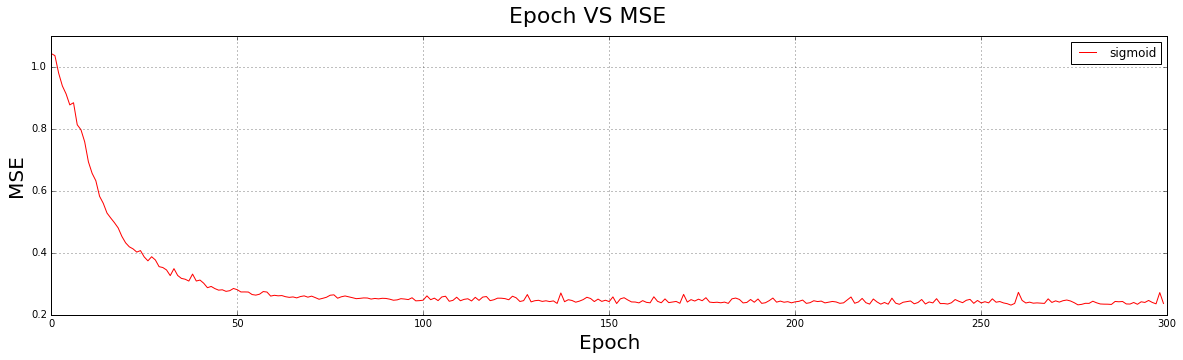

In [175]:
plotMseVsEpoch(200,"sigmoid",0.01,300)

## (e) Repita el paso anterior, utilizado 'Relu' como función de activación y compare con lo obtenido en d).

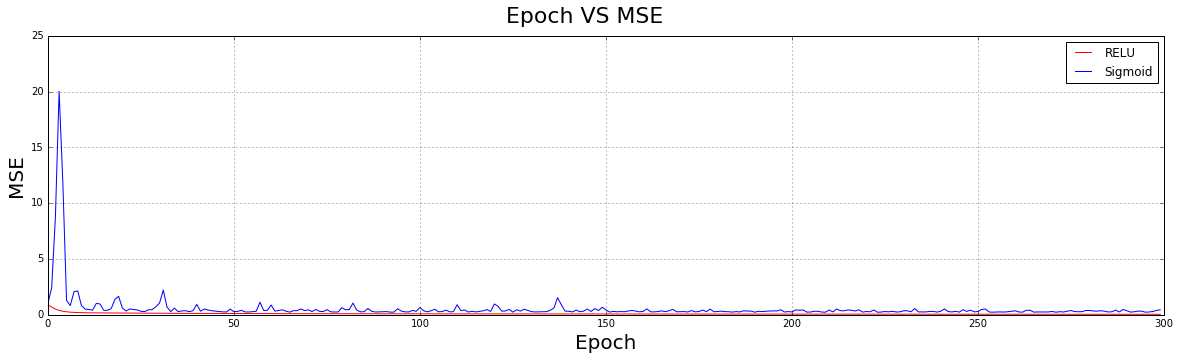

In [176]:
relu = plotMseVsEpoch(200,"relu",0.02,300,False)
sigm = plotMseVsEpoch(200,"sigmoid",0.02,300,False)
plt.figure(figsize=(20,5))
plt.plot(relu[0], relu[1], "-r",label="RELU")
plt.plot(sigm[0], sigm[1], "-b",label="Sigmoid")
plt.legend(loc='upper right')
plt.suptitle("Epoch VS MSE ",fontsize=22)
plt.ylabel("MSE",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.grid()
plt.show()

## (f) Repita d) variando el learning rate. Comente.

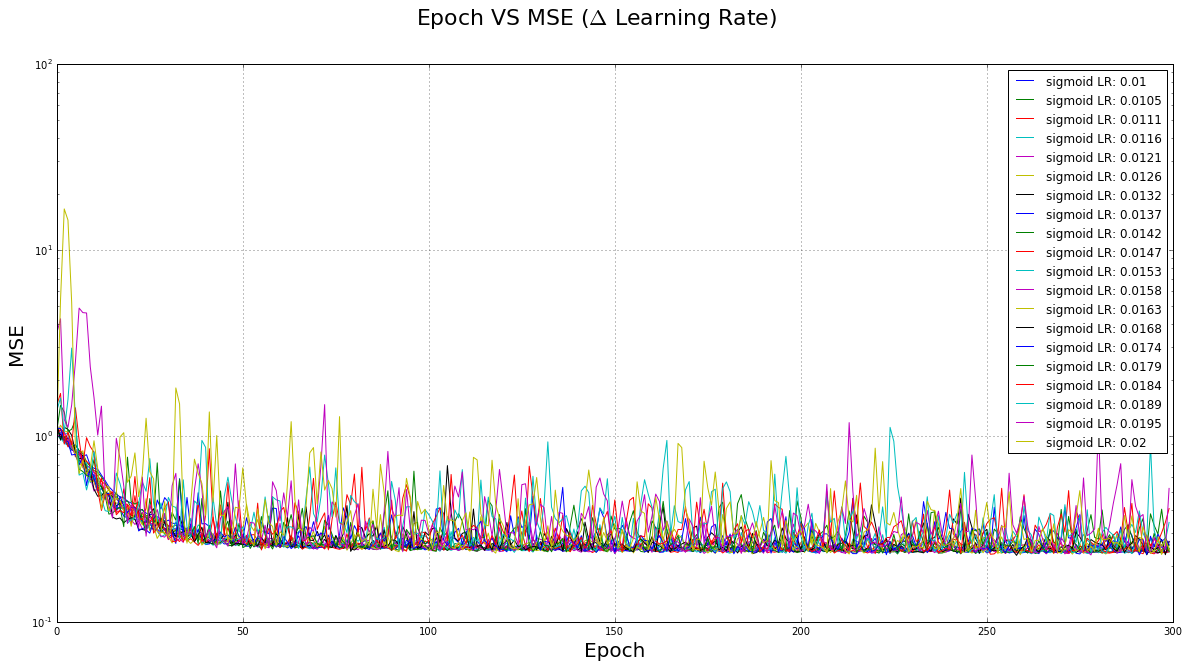

In [177]:
import numpy as np
from matplotlib import pyplot as plt

n_lr = 20 #20
lear_rate = np.linspace(0.01,0.02,n_lr)
result = []
for lr in lear_rate:
    result.append(plotMseVsEpoch(200,"sigmoid",lr,300,False))

plt.figure(figsize=(20,10))
for r in range (len(result)):
    plt.semilogy(result[r][0], result[r][1], label="sigmoid LR: " + str(round(lear_rate[r],4)))
    
plt.legend(loc='upper right')
plt.suptitle("Epoch VS MSE ($\Delta$ Learning Rate)",fontsize=22)
plt.ylabel("MSE",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.grid()
plt.show()

## (g) Estime el error de predicción de los modelos d) y e) usando validación cruzada con un número de folds igual a $K = 5$ y $K = 10$. Recuerde que para que la estimación sea razonable debe ajustar los pesos del modelo de nuevo, cada vez que trabaja sobre un determinado fold. Mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.

In [158]:
from sklearn import cross_validation

def errorFold(k,activation):
    Xm = X_train_scaled.as_matrix()
    ym = y_train.as_matrix()
    kfold = cross_validation.KFold(len(Xm), k)
    cvscores = []
    for i, (train, val) in enumerate(kfold):
        # create model
        model = Sequential()
        model.add(Dense(200, input_dim=Xm.shape[1], init="uniform"))
        model.add(Activation(activation))
        model.add(Dense(1, init="uniform"))
        model.add(Activation("linear"))

        # Compile model
        sgd = SGD(lr=0.02)
        model.compile(optimizer=sgd, loss="mean_squared_error")

        # Fit the model
        model.fit(Xm[train], ym[train], nb_epoch=300,verbose=0 )

        # evaluate the model
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)

    mse_cv = np.mean(cvscores)
    return mse_cv,cvscores

mse_group = [("sigmoid",5),("sigmoid",10),("relu",5),("relu",10)]
estimaciones = []
for t in mse_group:
    estimaciones.append(errorFold(t[1],t[0]))

32/37 [========================>.....] - ETA: 0s

In [159]:
estimaciones[1]

(0.28957524224956804,
 [0.28863603974643509,
  0.22703827054877029,
  0.22697780947936208,
  0.27067625071657331,
  0.49187974239650528,
  0.13556652516126633,
  0.64391624378530599,
  0.2292349503228539,
  0.25055139158901413,
  0.13127519874959379])

## (h) Entrene el modelo obtenido en d) usando *progressive decay* Compare y comente.

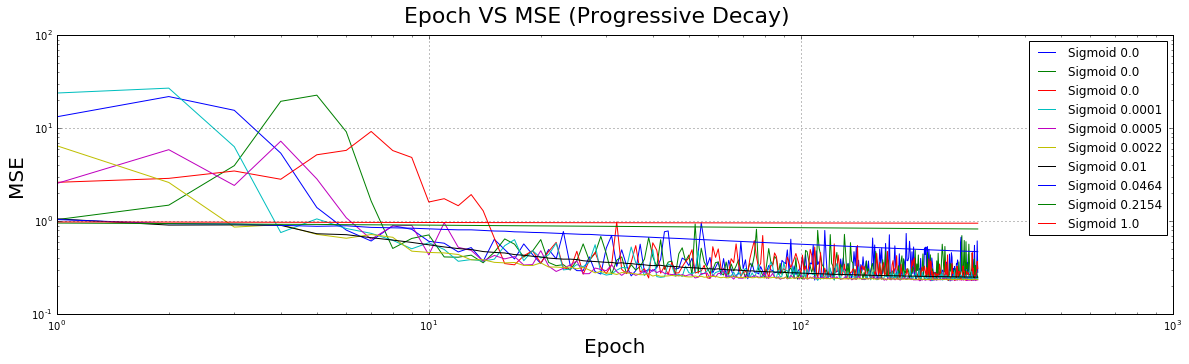

In [178]:
def plotDecay(pd):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init="uniform"))
    model.add(Activation("sigmoid"))
    model.add(Dense(1, init="uniform"))
    model.add(Activation("linear"))

    # sgd = SGD(lr=0.02)
    sgd = SGD(lr=0.02, decay=pd)
    model.compile(optimizer=sgd,loss="mean_squared_error")

    hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), 
                     nb_epoch=300, 
                     verbose=0, 
                     validation_data=(X_test_scaled.as_matrix(), 
                                      y_test.as_matrix()
                                     )
                    )
    return (hist.epoch,hist.history["loss"])



n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)

plt.figure(figsize=(20,5))
for pd in lear_decay:
    px,py = plotDecay(pd)
    plt.loglog(px, py,label="Sigmoid "+str(round(pd,4)))
plt.legend(loc='upper right')
plt.suptitle("Epoch VS MSE (Progressive Decay)",fontsize=22)
plt.ylabel("MSE",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.grid()
plt.show()

## (i) Entrene el modelo obtenido en d) usando momentum

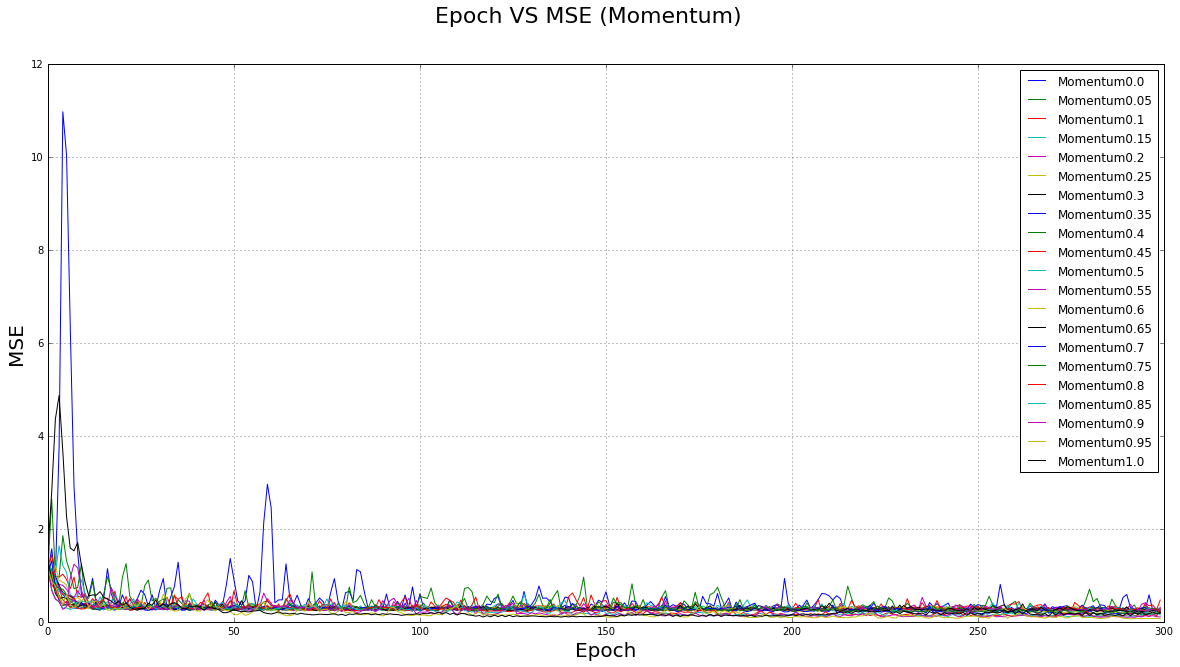

In [179]:
def plotMomentum(p):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init="uniform"))
    model.add(Activation("sigmoid"))
    model.add(Dense(1, init="uniform"))
    model.add(Activation("linear"))

    # sgd = SGD(lr=0.02)
    sgd = SGD(lr=0.02,momentum=p)
    model.compile(optimizer=sgd,loss="mean_squared_error")

    hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(), 
                     nb_epoch=300, 
                     verbose=0, 
                     validation_data=(X_test_scaled.as_matrix(), 
                                      y_test.as_matrix()
                                     )
                    )
    return (hist.epoch,hist.history["loss"])



n_decay = 21
momentum = np.linspace(0,1,n_decay)


plt.figure(figsize=(20,10))
for p in momentum:
    px,py = plotMomentum(p)
    plt.plot(px, py,label="Momentum"+str(round(p,4)))
plt.legend(loc='upper right')
plt.suptitle("Epoch VS MSE (Momentum)",fontsize=22)
plt.ylabel("MSE",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.grid()
plt.show()

## (j) Entrene los modelos obtenidos en d) y e) cambiando el tamaño del batch. Compare SGD, batch y mini-batch.

/Users/JGarces/anaconda3/envs/python35/lib/python3.5/site-packages/Keras-1.0.7-py3.5.egg/keras/engine/training.py:807: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  batch_ids = index_array[batch_start:batch_end]
/Users/JGarces/anaconda3/envs/python35/lib/python3.5/site-packages/Keras-1.0.7-py3.5.egg/keras/engine/training.py:914: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  batch_ids = index_array[batch_start:batch_end]


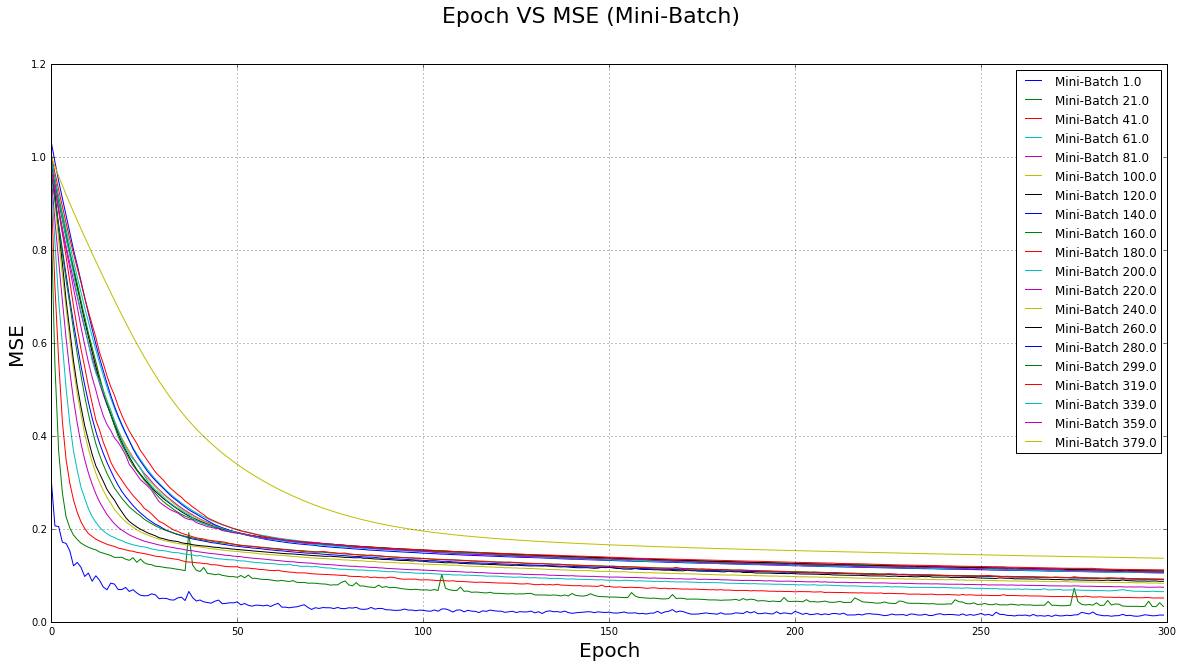

In [182]:
def plotMiniBatch(mb):
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init="uniform"))
    model.add(Activation("relu"))
    model.add(Dense(1, init="uniform"))
    model.add(Activation("linear"))

    # sgd = SGD(lr=0.02)
    sgd = SGD(lr=0.02)
    model.compile(optimizer=sgd,loss="mean_squared_error")

    hist = model.fit(X_train_scaled.as_matrix(), y_train.as_matrix(),
                     batch_size = mb,
                     nb_epoch=300, 
                     verbose=0, 
                     validation_data=(X_test_scaled.as_matrix(), 
                                      y_test.as_matrix()
                                     )
                    )
    return (hist.epoch,hist.history["loss"])



n_batches = 20
batch_sizes = np.round(np.linspace(1,X_train_scaled.shape[0],n_batches))


plt.figure(figsize=(20,10))
for mb in batch_sizes:
    px,py = plotMiniBatch(mb)
    plt.plot(px, py,label="Mini-Batch "+str(round(mb,4)))
plt.legend(loc='upper right')
plt.suptitle("Epoch VS MSE (Mini-Batch)",fontsize=22)
plt.ylabel("MSE",fontsize=20)
plt.xlabel("Epoch",fontsize=20)
plt.grid()
plt.show()

<hr><hr><hr>
<img width="30%" src="./img/CIFAR10.jpg">
# 3 Reconocimiento de Imágenes en CIFAR10
En esta sección trabajaremos con un dataset bastante conocido y utilizado por la comunidad para experimentar
con reconocimiento de objetos en imágenes: **CIFAR10**. Se trata de un conjunto de $60.000$ imágenes
RGB de $32 \times 32$ pixeles que contiene $10$ clases de objetos y $6000$ ejemplos por clase. La versión utilizada
se atribuye a A. Krizhevsky, V. Nair y G. Hinton $[3]$ y viene separada en $50000$ ejemplos de entrenamiento
y $10000$ casos de prueba. El conjunto de pruebas fue obtenido seleccionando $1000$ imágenes aleatorias de
cada clase. Los datos restantes han sido ordenados aleatoriamente y están organizados en $5$ bloques de entrenamiento
(batches). Las clases son mutuamente excluyentes y corresponden a las siguientes categorías:
gatos, perros, ranas, caballos, pájaros, ciervos, aviones, automóviles, camiones y barcos.
Los datos asociados a esta actividad podrán ser obtenidos utilizando los siguientes comandos en la línea
de comandos (sistemas UNIX)
```python
wget http://octopus.inf.utfsm.cl/~ricky/data.tar.gz
tar -xzvf data.tar.gz
rm data.tar.gz
```
En la carpeta generada encontrarán 5 archivos denominados 'data batch 1', 'data_batch_2', 'data_batch_3',
'data_batch_4', 'data_batch_5' y 'test_batch' correspondientes a los 5 bloques de entrenamiento y al conjunto
de pruebas respectivamente. Los archivos corresponden a diccionarios serializados de python y pueden ser
"extraídos" utilizando la siguiente función:

In [92]:
def unpickle(file):
    import cPickle
    fo = open(file, "rb")
    dict = cPickle.load(fo)
    fo.close()
    return dict

Una vez extraído, cada diccionario contendrá 2 elementos importantes: *data* y *labels*. El primer elemento
(data) es un matriz de $10000 \times 3072$ (numpy array). Cada fila de esa matriz corresponde a una imagen $RGB$:
los primeros $1024$ valores vienen del canal $R$, los siguientes $1024$ del canal $G$, y los últimos $1024$ del canal $B$.
Para cada canal, las imágenes han sido vectorizadas por filas, de modo que los primeros $32$ valores del canal
$R$ corresponden a la primera fila de la imagen. Por otro lado, el elemento (*labels*) del diccionario contiene
una lista de $1000$ valores enteros entre $0$ y $9$ que identifican las clases antes enumeradas.
```python
label_names = ["airplane","automobile", "bird", "cat","deer","dog","frog","horse","ship","truck"]
```


## (a) Construya una función que cargue todos los bloques de entrenamiento y pruebas del problema **CIFAR**
generando como salida: 

(i) dos matrices $X_{tr}$, $Y_{tr}$, correspondientes a las imágenes y etiquetas de entrenamiento,<br>
(ii) dos matrices $X_{t}$, $Y_{t}$, correspondientes a las imágenes y etiquetas de pruebas, y finalmente<br>
(iii) dos matrices $X_{v}$, $Y_{v}$, correspondientes a imágenes y etiquetas que se usarán como conjunto de
validación, es decir para tomar decisiones de diseño acerca del modelo. 

Este último conjunto debe ser
extraído desde el conjunto de entrenamiento original y no debe superar las $5000$ imágenes.

In [ ]:
import cPickle as pickle
import numpy as np
import os
from scipy.misc import imread

def load_CIFAR_one(filename):
    with open(filename, "rb") as f:
        datadict = pickle.load(f)
        X = datadict[data]
        Y = datadict[labels]
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(PATH):
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(PATH,data_batch_%d % (b, ))
        X, Y = load_CIFAR_one(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(PATH, test_batch))
    return Xtr, Ytr, Xte, Yte

## (b) Construya una función que escale apropiadamente las imágenes antes de trabajar. Experimente sólo centrando los datos y luego centrando y escalándolos como en actividades anteriores.

## (c) Diseñe, entrene y evalúe una red neuronal con salida softmax para el problema CIFAR a partir de la representación original de las imágenes (píxeles RGB). Experimente con distintas arquitecturas y métodos de entrenamiento, midiendo el error de clasificación sobre el conjunto de validación. En base a esta última medida de desempeño, decida qué modelo, de entre todos los evaluados, evaluará finalmente en el conjunto de test. Reporte y discuta los resultados obtenidos. Se espera que logre obtener un error de pruebas menor o igual a 0.5.

(d) Repita la actividad anterior, pero mejorando los atributos utilizados para representar las imágenes.
Para esta parte, se distribuirá junto a esta tarea una función denominada *extract_features.py* que extraerá 2 tipos de representaciones sobre una imagen y conjunto de imágenes: 

(i) histogramas de tono<br>
(ii) descriptores HOG. <br>
Reporte y discuta los resultados obtenidos utilizando las distintas representaciones
por separado o todas simultáneamente. La función *extract_features.py* estará definida en un script denominado *top_level_features.py* y puede ser importada y utilizada como se muestra a
continuación

In [ ]:
from top_level_features import hog_features
from top_level_features import color_histogram_hsv
from top_level_features import extract_features

Xtr, Ytr, Xte, Yte = load_CIFAR10("datasets/")
features = extract_features(Xtr,[hog_features]) #extrae hog features
features = extract_features(Xtr,[color_histogram_hsv]) #extrae histogramas de color
features = extract_features(Xtr,[hog_features, color_histogram_hsv]) #extrae todo
print (Xtr.shape)
print (features.shape)

## References
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), The Elements of Statistical Learning, Second Edition.
Springer New York Inc.

[2] Bishop, Christopher M. (1995). Neural Networks for Pattern Recognition, Clarendon Press.

[3] Krizhevsky, A., Hinton, G. (2009). Learning multiple layers of features from tiny images.

[4] Harrison, D. and Rubinfeld, D. (1978). Hedonic prices and the demand for clean air, Journal of Environmental
Economics and Management, 5, 81-102

[5] Dalal, N., Triggs, B. (2005, June). Histograms of oriented gradients for human detection. In 2005 IEEE
Computer Society Conference on Computer Vision and Pattern Recognition (CVPR'05) (Vol. 1, pp.
886-893). IEEE.

[6] Forsyth, D. A., Ponce, J. (2002). Computer vision: a modern approach. Prentice Hall Professional
Technical Reference.